In [1]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import fiona
import pandas as pd
import geopandas as gpd
import rasterio as rio
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from geofeather import to_geofeather, from_geofeather

# Import G-LiHT Points overlayed with heights and mangrove extent

In [2]:
# Working Directory
work_dir = '/Users/arbailey/natcap/idb/data/work/mangroves/yucatan'
os.chdir(work_dir)

In [3]:
# Import the previously joined point file layer (with SRTM & mangrove extents) into GeoDataFrame 
%time gliht_srtm_mangroves_N20W088 = from_geofeather('gliht_srtm_mangroves_N20W088.feather')
gliht_srtm_mangroves_N20W088

CPU times: user 1min 23s, sys: 4.12 s, total: 1min 27s
Wall time: 1min 31s


,index,z_dtm_m,x_utm16n,y_utm16n,geometry,gliht_ptidx,gliht_ptid,z_chm_m,srtm_m,srtm_idx,tile,tile_srtmidx,hmax95,hba95,hmax_idx,tile_hmaxidx,wam,gmw2016,gmf,ncMAR
0,0,1.391269,445382.5,2235137.5,POINT (-87.52283 20.21299),1,445382.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
1,1,1.397088,445383.5,2235137.5,POINT (-87.52282 20.21299),2,445383.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
2,2,1.445915,445384.5,2235137.5,POINT (-87.52281 20.21299),3,445384.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
3,3,1.363443,445385.5,2235137.5,POINT (-87.52280 20.21299),4,445385.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
4,4,1.409119,445386.5,2235137.5,POINT (-87.52279 20.21299),5,445386.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7559444,7554386,0.529550,444687.5,2211553.5,POINT (-87.52877 19.99986),7554630,444687.5_2211553.5,1.36,-1,12965297,N20W088,N20W088_12965297,0.0,0.0,2152971530,N20W088_2152971530,1.0,1.0,NaN,NaN
7559445,7554387,0.662233,444688.5,2211553.5,POINT (-87.52876 19.99986),7554631,444688.5_2211553.5,1.02,-1,12965297,N20W088,N20W088_12965297,0.0,0.0,2152971530,N20W088_2152971530,1.0,1.0,NaN,NaN
7559446,7554387,0.662233,444688.5,2211553.5,POINT (-87.52876 19.99986),7554631,444688.5_2211553.5,1.02,-1,12965297,N20W088,N20W088_12965297,0.0,0.0,2152971530,N20W088_2152971530,1.0,1.0,NaN,NaN
7559447,7554388,0.465823,444689.5,2211553.5,POINT (-87.52875 19.99986),7554632,444689.5_2211553.5,1.13,-1,12965298,N20W088,N20W088_12965298,0.0,0.0,2152971530,N20W088_2152971530,1.0,1.0,NaN,NaN


In [4]:
# Import the previously joined point file layer (with SRTM & mangrove extents) into GeoDataFrame 
%time gliht_srtm_mangroves_N20W091 = from_geofeather('gliht_srtm_mangroves_N20W091.feather')
gliht_srtm_mangroves_N20W091

CPU times: user 8min 5s, sys: 46.2 s, total: 8min 51s
Wall time: 9min 40s


,index,z_dtm_m,x_utm16n,y_utm16n,geometry,gliht_ptidx,gliht_ptid,z_chm_m,srtm_m,srtm_idx,tile,tile_srtmidx,hmax95,hba95,hmax_idx,tile_hmaxidx,wam,gmw2016,gmf,ncMAR
0,0,0.682112,766448.5,2216378.5,POINT (-90.45305 20.02592),1,766448.5_2216378.5,NaN,2,12630677,N20W091,N20W091_12630677,0.0,0.0,2137818371,N20W091_2137818371,NaN,NaN,NaN,NaN
1,1,0.754790,766449.5,2216378.5,POINT (-90.45304 20.02592),2,766449.5_2216378.5,NaN,2,12630677,N20W091,N20W091_12630677,0.0,0.0,2137818371,N20W091_2137818371,NaN,NaN,NaN,NaN
2,2,0.756222,766450.5,2216378.5,POINT (-90.45303 20.02592),3,766450.5_2216378.5,NaN,2,12630677,N20W091,N20W091_12630677,0.0,0.0,2137818371,N20W091_2137818371,NaN,NaN,NaN,NaN
3,3,0.753452,766451.5,2216378.5,POINT (-90.45302 20.02592),4,766451.5_2216378.5,NaN,2,12630677,N20W091,N20W091_12630677,0.0,0.0,2137818371,N20W091_2137818371,NaN,NaN,NaN,NaN
4,4,0.726580,766452.5,2216378.5,POINT (-90.45301 20.02592),5,766452.5_2216378.5,NaN,2,12630677,N20W091,N20W091_12630677,0.0,0.0,2137818371,N20W091_2137818371,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44264292,44247001,2.338390,791382.5,2318076.5,POINT (-90.19828 20.94020),46599477,791382.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN
44264293,44247002,2.353021,791383.5,2318076.5,POINT (-90.19827 20.94020),46599478,791383.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN
44264294,44247003,2.321229,791384.5,2318076.5,POINT (-90.19826 20.94020),46599479,791384.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN
44264295,44247004,2.285768,791385.5,2318076.5,POINT (-90.19825 20.94020),46599480,791385.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN


In [5]:
# Combine geodataframes for N20W088 and N20W091 together
pts_all = pd.concat([gliht_srtm_mangroves_N20W088, gliht_srtm_mangroves_N20W091], ignore_index=True )
pts_all

,index,z_dtm_m,x_utm16n,y_utm16n,geometry,gliht_ptidx,gliht_ptid,z_chm_m,srtm_m,srtm_idx,tile,tile_srtmidx,hmax95,hba95,hmax_idx,tile_hmaxidx,wam,gmw2016,gmf,ncMAR
0,0,1.391269,445382.5,2235137.5,POINT (-87.52283 20.21299),1,445382.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
1,1,1.397088,445383.5,2235137.5,POINT (-87.52282 20.21299),2,445383.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
2,2,1.445915,445384.5,2235137.5,POINT (-87.52281 20.21299),3,445384.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
3,3,1.363443,445385.5,2235137.5,POINT (-87.52280 20.21299),4,445385.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
4,4,1.409119,445386.5,2235137.5,POINT (-87.52279 20.21299),5,445386.5_2235137.5,NaN,6,10203352,N20W088,N20W088_10203352,0.0,0.0,2028085544,N20W088_2028085544,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51823741,44247001,2.338390,791382.5,2318076.5,POINT (-90.19828 20.94020),46599477,791382.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN
51823742,44247002,2.353021,791383.5,2318076.5,POINT (-90.19827 20.94020),46599478,791383.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN
51823743,44247003,2.321229,791384.5,2318076.5,POINT (-90.19826 20.94020),46599479,791384.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN
51823744,44247004,2.285768,791385.5,2318076.5,POINT (-90.19825 20.94020),46599480,791385.5_2318076.5,NaN,4,777102,N20W091,N20W091_777102,0.0,0.0,1601802680,N20W091_1601802680,NaN,NaN,NaN,NaN


# Subset Points to Include only G-LiHT Canopy Height > 0 and Mangrove presence (from 4 different extent layers)

In [12]:
# Functions for geodataframe subsetting and grouping

# Subset points Geodataframe based on GLiHT Canopy Height > 0 and specified mangrove presence attribute
def subset_mangrove(pts_gdf, mangrove_attribute):
    subset_gdf = pts_gdf[(pts_gdf['z_chm_m'] > 0) & (pts_gdf[mangrove_attribute] > 0)]
    return subset_gdf

# GRoup Data frame with some summary stats on GLiHT canopy heights
def grouped_glihtCHM(pts_gdf, grouping_cols=['srtm_id','srtm_m']):
    grouped_df = pts_gdf.groupby(
        grouping_cols
    ).agg(
        max_z = ('z_chm_m', 'max'),
        min_z = ('z_chm_m', 'min'),
        mean_z = ('z_chm_m', 'mean'),
        median_z = ('z_chm_m', 'median'),
        var_z = ('z_chm_m', 'var'),
        skew_z = ('z_chm_m', 'skew'),
        count_z = ('z_chm_m', 'count'),
    ) 
    grouped_df.reset_index(inplace=True)  # Reset index to make grouped columns into regular columns   
    return grouped_df

In [13]:
pts_gt0_gmf = subset_mangrove(pts_all, 'gmf')
pts_gt0_gmf

,index,z_dtm_m,x_utm16n,y_utm16n,geometry,gliht_ptidx,gliht_ptid,z_chm_m,srtm_m,srtm_idx,tile,tile_srtmidx,hmax95,hba95,hmax_idx,tile_hmaxidx,wam,gmw2016,gmf,ncMAR
3030326,3030326,1.275995,446378.5,2225540.5,POINT (-87.51301 20.12630),3030327,446378.5_2225540.5,0.44,0,11326899,N20W088,N20W088_11326899,0.0,0.0,2078886667,N20W088_2078886667,NaN,1.0,1.0,1.0
3030327,3030327,1.232442,446379.5,2225540.5,POINT (-87.51300 20.12630),3030328,446379.5_2225540.5,0.13,0,11326899,N20W088,N20W088_11326899,0.0,0.0,2078886667,N20W088_2078886667,NaN,1.0,1.0,1.0
3030330,3030330,1.107517,446382.5,2225540.5,POINT (-87.51298 20.12630),3030331,446382.5_2225540.5,0.21,0,11326899,N20W088,N20W088_11326899,0.0,0.0,2078886667,N20W088_2078886667,NaN,1.0,1.0,1.0
3030338,3030338,1.281082,446390.5,2225540.5,POINT (-87.51290 20.12630),3030339,446390.5_2225540.5,0.31,0,11326900,N20W088,N20W088_11326900,0.0,0.0,2078886667,N20W088_2078886667,NaN,1.0,1.0,1.0
3030339,3030339,1.271321,446391.5,2225540.5,POINT (-87.51289 20.12630),3030340,446391.5_2225540.5,0.95,0,11326900,N20W088,N20W088_11326900,0.0,0.0,2078886668,N20W088_2078886668,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50113948,42537208,1.858883,790799.5,2322712.5,POINT (-90.20310 20.98213),44889684,790799.5_2322712.5,9.68,6,233334,N20W091,N20W091_233334,0.0,0.0,1577216239,N20W091_1577216239,1.0,1.0,1.0,1.0
50113949,42537209,1.704055,790800.5,2322712.5,POINT (-90.20309 20.98213),44889685,790800.5_2322712.5,9.99,6,233334,N20W091,N20W091_233334,0.0,0.0,1577216239,N20W091_1577216239,1.0,1.0,1.0,1.0
50113950,42537210,1.673301,790801.5,2322712.5,POINT (-90.20308 20.98213),44889686,790801.5_2322712.5,7.16,6,233334,N20W091,N20W091_233334,0.0,0.0,1577216239,N20W091_1577216239,1.0,1.0,1.0,1.0
50113951,42537211,1.537881,790802.5,2322712.5,POINT (-90.20307 20.98213),44889687,790802.5_2322712.5,9.03,6,233334,N20W091,N20W091_233334,0.0,0.0,1577216239,N20W091_1577216239,1.0,1.0,1.0,1.0


In [14]:
pts_gt0_gmw2016 = subset_mangrove(pts_all, 'gmw2016')
pts_gt0_gmw2016

,index,z_dtm_m,x_utm16n,y_utm16n,geometry,gliht_ptidx,gliht_ptid,z_chm_m,srtm_m,srtm_idx,tile,tile_srtmidx,hmax95,hba95,hmax_idx,tile_hmaxidx,wam,gmw2016,gmf,ncMAR
2783701,2783701,0.799474,446460.5,2226844.5,POINT (-87.51227 20.13809),2783702,446460.5_2226844.5,1.705303e-13,5,11175660,N20W088,N20W088_11175660,0.0,0.0,2072048062,N20W088_2072048062,NaN,1.0,NaN,NaN
2784434,2784434,0.764444,446464.5,2226842.5,POINT (-87.51223 20.13807),2784435,446464.5_2226842.5,2.970000e+00,5,11175660,N20W088,N20W088_11175660,0.0,0.0,2072048062,N20W088_2072048062,NaN,1.0,NaN,NaN
2786254,2786254,0.859141,446464.5,2226837.5,POINT (-87.51223 20.13802),2786255,446464.5_2226837.5,4.160000e+00,5,11175660,N20W088,N20W088_11175660,0.0,0.0,2072048062,N20W088_2072048062,NaN,1.0,NaN,NaN
2786614,2786614,0.774884,446460.5,2226836.5,POINT (-87.51227 20.13801),2786615,446460.5_2226836.5,6.600000e-01,5,11175660,N20W088,N20W088_11175660,0.0,0.0,2072048062,N20W088_2072048062,NaN,1.0,NaN,NaN
2786615,2786615,0.879933,446461.5,2226836.5,POINT (-87.51226 20.13801),2786616,446461.5_2226836.5,7.900000e-01,5,11175660,N20W088,N20W088_11175660,0.0,0.0,2072048062,N20W088_2072048062,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51220874,43644134,1.713002,791101.5,2319724.5,POINT (-90.20070 20.95511),45996610,791101.5_2319724.5,2.530000e+00,5,586240,N20W091,N20W091_586240,0.0,0.0,1593172999,N20W091_1593172999,NaN,1.0,NaN,NaN
51220875,43644135,1.709333,791102.5,2319724.5,POINT (-90.20069 20.95511),45996611,791102.5_2319724.5,6.970000e+00,4,586241,N20W091,N20W091_586241,0.0,0.0,1593172999,N20W091_1593172999,NaN,1.0,NaN,NaN
51220876,43644136,1.661228,791103.5,2319724.5,POINT (-90.20068 20.95511),45996612,791103.5_2319724.5,7.810000e+00,4,586241,N20W091,N20W091_586241,0.0,0.0,1593172999,N20W091_1593172999,NaN,1.0,NaN,NaN
51220877,43644137,1.654976,791104.5,2319724.5,POINT (-90.20067 20.95511),45996613,791104.5_2319724.5,7.620000e+00,4,586241,N20W091,N20W091_586241,0.0,0.0,1593172999,N20W091_1593172999,NaN,1.0,NaN,NaN


In [15]:
pts_gt0_wam = subset_mangrove(pts_all, 'wam')
pts_gt0_wam

,index,z_dtm_m,x_utm16n,y_utm16n,geometry,gliht_ptidx,gliht_ptid,z_chm_m,srtm_m,srtm_idx,tile,tile_srtmidx,hmax95,hba95,hmax_idx,tile_hmaxidx,wam,gmw2016,gmf,ncMAR
4831641,4831641,0.609769,445866.5,2219791.5,POINT (-87.51774 20.07434),4831642,445866.5_2219791.5,0.11,0,12000269,N20W088,N20W088_12000269,0.0,0.0,2109334738,N20W088_2109334738,1.0,1.0,NaN,1.0
4831975,4831975,0.549570,445864.5,2219790.5,POINT (-87.51776 20.07433),4831976,445864.5_2219790.5,0.11,0,12000269,N20W088,N20W088_12000269,0.0,0.0,2109334738,N20W088_2109334738,1.0,1.0,NaN,1.0
4831976,4831976,0.559005,445865.5,2219790.5,POINT (-87.51775 20.07433),4831977,445865.5_2219790.5,0.02,0,12000269,N20W088,N20W088_12000269,0.0,0.0,2109334738,N20W088_2109334738,1.0,1.0,NaN,1.0
4833637,4833637,0.717384,445849.5,2219785.5,POINT (-87.51790 20.07428),4833638,445849.5_2219785.5,0.58,0,12003870,N20W088,N20W088_12003870,0.0,0.0,2109497561,N20W088_2109497561,1.0,1.0,NaN,1.0
4833987,4833987,0.516457,445863.5,2219784.5,POINT (-87.51777 20.07427),4833988,445863.5_2219784.5,0.57,0,12003870,N20W088,N20W088_12003870,0.0,0.0,2109497562,N20W088_2109497562,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50876920,43300180,1.643824,790932.5,2320656.5,POINT (-90.20217 20.96355),45652656,790932.5_2320656.5,6.35,7,474604,N20W091,N20W091_474604,0.0,0.0,1588125450,N20W091_1588125450,1.0,1.0,NaN,1.0
50876921,43300181,1.657102,790933.5,2320656.5,POINT (-90.20216 20.96355),45652657,790933.5_2320656.5,6.69,7,474604,N20W091,N20W091_474604,0.0,0.0,1588125450,N20W091_1588125450,1.0,1.0,NaN,1.0
50876922,43300182,1.650434,790934.5,2320656.5,POINT (-90.20215 20.96355),45652658,790934.5_2320656.5,8.20,7,474604,N20W091,N20W091_474604,0.0,0.0,1588125450,N20W091_1588125450,1.0,1.0,NaN,1.0
50877298,43300558,1.662111,790931.5,2320655.5,POINT (-90.20218 20.96354),45653034,790931.5_2320655.5,6.74,7,474604,N20W091,N20W091_474604,0.0,0.0,1588125450,N20W091_1588125450,1.0,1.0,NaN,1.0


In [16]:
pts_gt0_ncMAR = subset_mangrove(pts_all, 'ncMAR') 
pts_gt0_ncMAR

,index,z_dtm_m,x_utm16n,y_utm16n,geometry,gliht_ptidx,gliht_ptid,z_chm_m,srtm_m,srtm_idx,tile,tile_srtmidx,hmax95,hba95,hmax_idx,tile_hmaxidx,wam,gmw2016,gmf,ncMAR
2861419,2861419,1.252075,446523.5,2226629.5,POINT (-87.51166 20.13615),2861420,446523.5_2226629.5,7.20,4,11200869,N20W088,N20W088_11200869,0.0,0.0,2073187832,N20W088_2073187832,NaN,1.0,NaN,1.0
2861420,2861420,1.315502,446524.5,2226629.5,POINT (-87.51165 20.13615),2861421,446524.5_2226629.5,8.36,4,11200869,N20W088,N20W088_11200869,0.0,0.0,2073187832,N20W088_2073187832,NaN,1.0,NaN,1.0
2861421,2861421,1.192161,446525.5,2226629.5,POINT (-87.51164 20.13615),2861422,446525.5_2226629.5,8.04,4,11200869,N20W088,N20W088_11200869,0.0,0.0,2073187832,N20W088_2073187832,NaN,1.0,NaN,1.0
2861422,2861422,1.200993,446526.5,2226629.5,POINT (-87.51163 20.13615),2861423,446526.5_2226629.5,6.19,4,11200869,N20W088,N20W088_11200869,0.0,0.0,2073187832,N20W088_2073187832,NaN,1.0,NaN,1.0
2861423,2861423,1.156127,446527.5,2226629.5,POINT (-87.51162 20.13615),2861424,446527.5_2226629.5,6.59,4,11200869,N20W088,N20W088_11200869,0.0,0.0,2073187832,N20W088_2073187832,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007772,43431032,1.704390,791016.5,2320307.5,POINT (-90.20142 20.96039),45783508,791016.5_2320307.5,2.69,6,517819,N20W091,N20W091_517819,0.0,0.0,1590079341,N20W091_1590079341,NaN,1.0,NaN,1.0
51007773,43431033,1.732216,791017.5,2320307.5,POINT (-90.20141 20.96039),45783509,791017.5_2320307.5,1.59,6,517819,N20W091,N20W091_517819,0.0,0.0,1590079341,N20W091_1590079341,NaN,1.0,NaN,1.0
51007774,43431034,1.734412,791018.5,2320307.5,POINT (-90.20140 20.96039),45783510,791018.5_2320307.5,2.19,6,517819,N20W091,N20W091_517819,0.0,0.0,1590079341,N20W091_1590079341,NaN,1.0,NaN,1.0
51008144,43431404,1.724372,791016.5,2320306.5,POINT (-90.20142 20.96038),45783880,791016.5_2320306.5,1.64,6,517819,N20W091,N20W091_517819,0.0,0.0,1590079341,N20W091_1590079341,NaN,1.0,NaN,1.0


# Group Points by SRTM cell ID to get max Canopy Height values per SRTM pixel

In [17]:
groupedSRTM_gliht_gmf = grouped_glihtCHM(pts_gt0_gmf, ['srtm_idx','srtm_m'])
groupedSRTM_gliht_gmf

,srtm_idx,srtm_m,max_z,min_z,mean_z,median_z,var_z,skew_z,count_z
0,17262,4,0.23,2.300000e-01,0.230000,0.230,NaN,NaN,1
1,17263,4,3.07,1.700000e-01,1.602564,1.730,0.795267,-0.155412,39
2,17264,4,3.05,1.460000e+00,2.013333,1.530,0.807233,1.720230,3
3,17268,3,4.40,8.100000e-01,3.206000,3.225,0.555480,-0.927618,30
4,17269,4,5.34,7.700000e-01,2.789583,2.720,0.903876,0.401023,48
...,...,...,...,...,...,...,...,...,...
25080,12958358,0,3.20,2.842171e-14,1.084706,0.900,0.584526,1.164018,17
25081,12961958,0,1.72,8.200000e-01,1.140000,1.050,0.115767,1.061808,7
25082,12961959,1,1.61,3.900000e-01,0.919000,0.955,0.146357,0.302410,20
25083,12965559,0,3.00,4.900000e-01,1.297500,1.030,0.540087,1.721415,16


In [18]:
groupedSRTM_gliht_gmw2016 = grouped_glihtCHM(pts_gt0_gmw2016, ['srtm_idx','srtm_m'])
groupedSRTM_gliht_gmw2016

,srtm_idx,srtm_m,max_z,min_z,mean_z,median_z,var_z,skew_z,count_z
0,2484,4,6.08,2.350000e+00,4.416808,4.45,0.695440,-0.109478,141
1,2485,4,7.83,1.560000e+00,4.641189,4.60,0.935151,0.189317,1194
2,2486,6,9.53,8.100000e-01,4.822298,4.73,2.198236,0.301168,1249
3,2487,6,7.62,1.570000e+00,4.226659,4.20,1.156014,0.304339,1323
4,2488,5,6.91,1.120000e+00,4.126351,4.15,0.937942,0.052041,1321
...,...,...,...,...,...,...,...,...,...
52818,12965568,3,2.17,1.598721e-14,1.256869,1.29,0.170614,-0.170656,99
52819,12965569,3,3.70,2.400000e-01,1.896774,1.86,0.611697,0.043110,217
52820,12965570,2,5.08,6.500000e-01,2.974630,3.05,0.856169,-0.187538,635
52821,12965571,1,5.60,7.200000e-01,3.368981,3.46,1.094672,-0.265316,775


In [19]:
groupedSRTM_gliht_wam = grouped_glihtCHM(pts_gt0_wam, ['srtm_idx','srtm_m'])
groupedSRTM_gliht_wam

,srtm_idx,srtm_m,max_z,min_z,mean_z,median_z,var_z,skew_z,count_z
0,2484,4,6.08,2.350000e+00,4.416808,4.450,0.695440,-0.109478,141
1,2485,4,7.83,1.560000e+00,4.641189,4.600,0.935151,0.189317,1194
2,2486,6,9.53,8.100000e-01,4.822298,4.730,2.198236,0.301168,1249
3,2487,6,7.62,1.570000e+00,4.226659,4.200,1.156014,0.304339,1323
4,2488,5,6.91,1.120000e+00,4.126351,4.150,0.937942,0.052041,1321
...,...,...,...,...,...,...,...,...,...
30162,12965568,3,2.70,1.598721e-14,1.292968,1.270,0.250528,0.399625,155
30163,12965569,3,3.77,2.400000e-01,1.897207,1.875,0.582813,0.101649,290
30164,12965570,2,5.08,6.500000e-01,2.974630,3.050,0.856169,-0.187538,635
30165,12965571,1,5.60,7.200000e-01,3.368981,3.460,1.094672,-0.265316,775


In [20]:
groupedSRTM_gliht_ncMAR = grouped_glihtCHM(pts_gt0_ncMAR, ['srtm_idx','srtm_m'])
groupedSRTM_gliht_ncMAR

,srtm_idx,srtm_m,max_z,min_z,mean_z,median_z,var_z,skew_z,count_z
0,2484,4,6.08,2.35,4.416808,4.450,0.695440,-0.109478,141
1,2485,4,7.83,1.56,4.641189,4.600,0.935151,0.189317,1194
2,2486,6,9.53,0.81,4.822298,4.730,2.198236,0.301168,1249
3,2487,6,7.62,1.57,4.226659,4.200,1.156014,0.304339,1323
4,2488,5,6.91,1.12,4.126351,4.150,0.937942,0.052041,1321
...,...,...,...,...,...,...,...,...,...
48953,12965563,3,0.50,0.50,0.500000,0.500,NaN,NaN,1
48954,12965569,3,3.77,0.24,1.897207,1.875,0.582813,0.101649,290
48955,12965570,2,5.08,0.65,2.974630,3.050,0.856169,-0.187538,635
48956,12965571,1,5.60,0.72,3.368981,3.460,1.094672,-0.265316,775


# Hex Plots for G-LiHT Max Height vs. SRTM elevation

In [93]:
# Compare Hex Plots for different mangrove data sources (grouped)
def hexjointplot(df, sourcetext, xatt='srtm_m', yatt='max_z', xlabl="SRTM Elevation (m)", ylabl="G-LiHT Max Height (m)"):
    sns.set(style="ticks", font_scale=1.4)
    # Hex bin plot with regression and histograms
    hp = sns.jointplot(x=df[xatt], y=df[yatt],
                  kind='hex', height=6,
                  xlim=(-4, 20), ylim=(0, 26), 
                  marginal_kws=dict(rug=True)
                  )
#     title = 'SRTM vs GLiHT Canopy height in grouped {} data'.format(sourcetext)
#     plt.title(title, loc='right')
    hp.ax_joint.text(14,24,sourcetext)
#     hp.set_axis_labels("SRTM Elevation (m)", "G-LiHT Max Height (m)", fontsize=16)
    hp.ax_joint.set_xlabel(xlabl)
    hp.ax_joint.set_ylabel(ylabl)
    hp.ax_joint.set_xticks(range(-4,20,2))
    hp.ax_joint.set_yticks(range(0,26,2))

#     plt.xlim(-5,25)
#     plt.ylim(0,25)

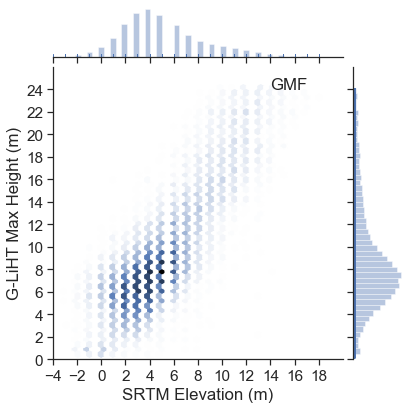

In [94]:
hexjointplot(groupedSRTM_gliht_gmf, 'GMF')

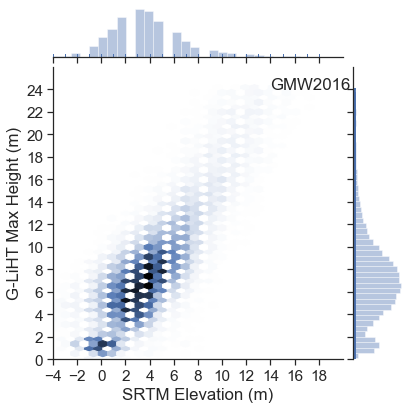

In [95]:
hexjointplot(groupedSRTM_gliht_gmw2016, 'GMW2016')

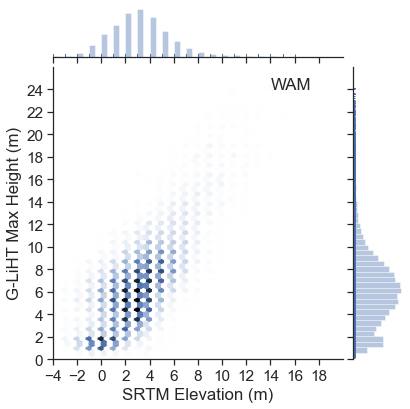

In [96]:
hexjointplot(groupedSRTM_gliht_wam, 'WAM')

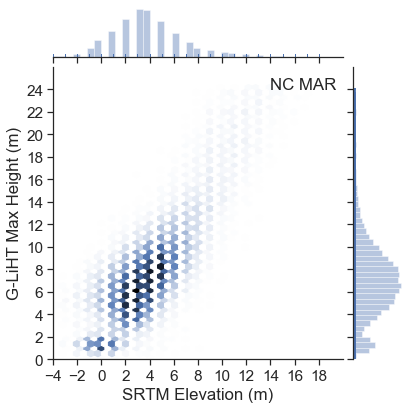

In [98]:
hexjointplot(groupedSRTM_gliht_ncMAR, 'NC MAR')

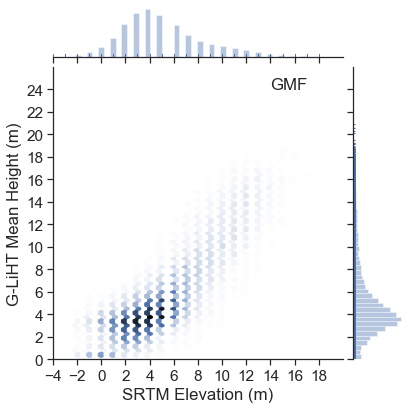

In [99]:
hexjointplot(groupedSRTM_gliht_gmf, 'GMF', yatt='mean_z', ylabl="G-LiHT Mean Height (m)")

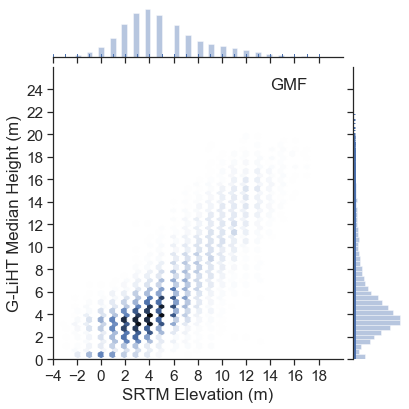

In [100]:
hexjointplot(groupedSRTM_gliht_gmf, 'GMF', yatt='median_z', ylabl="G-LiHT Median Height (m)")

# Linear Regression for G-LiHT Max Height vs. SRTM elevation

In [66]:
def linear_regress(df, x_att, y_att, fi=True):
    linear_regressor = LinearRegression(fit_intercept=fi)  # create object for the class
    X = df[x_att].values.reshape(-1, 1)
    Y = df[y_att].values.reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions

    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='orange')
    plt.xlabel(x_att)
    plt.ylabel(y_att)
    plt.show()

    r_sq = linear_regressor.score(X, Y)
    print("R squared:", r_sq)
    intercept = linear_regressor.intercept_
    print("intercept:", intercept)
    slope = linear_regressor.coef_
    print("slope:", slope)
    rmse = np.sqrt(mean_squared_error(y_true=Y, y_pred=Y_pred))
    print("RMSE:", rmse)

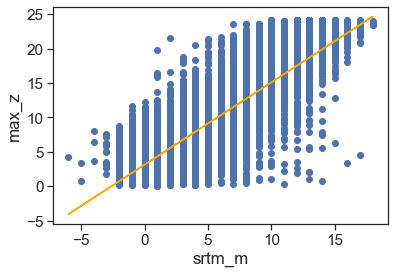

R squared: 0.6495429230909424
intercept: [3.14361817]
slope: [[1.19530718]]
RMSE: 2.873569849432397


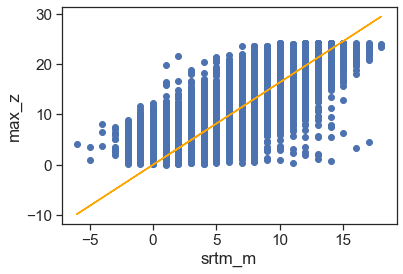

R squared: 0.5242616754659197
intercept: 0.0
slope: [[1.63492022]]
RMSE: 3.348022827641444


In [67]:
linear_regress(groupedSRTM_gliht_gmf, 'srtm_m', 'max_z', True)
linear_regress(groupedSRTM_gliht_gmf, 'srtm_m', 'max_z', False) # define intercept as 0

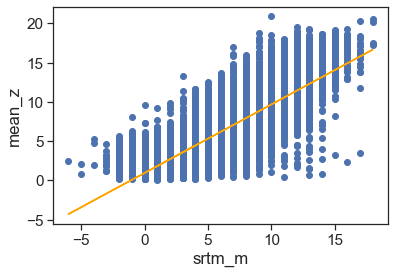

R squared: 0.6716807052044675
intercept: [0.93683473]
slope: [[0.87328474]]
RMSE: 1.998257153397042


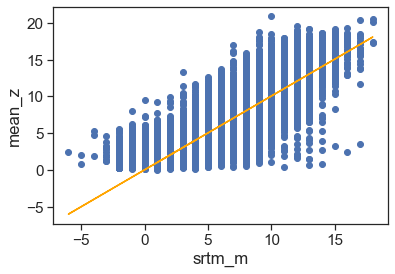

R squared: 0.6501253695827006
intercept: 0.0
slope: [[1.00429453]]
RMSE: 2.0628108144562574


In [68]:
linear_regress(groupedSRTM_gliht_gmf, 'srtm_m', 'mean_z', True)
linear_regress(groupedSRTM_gliht_gmf, 'srtm_m', 'mean_z', False) # define intercept as 0

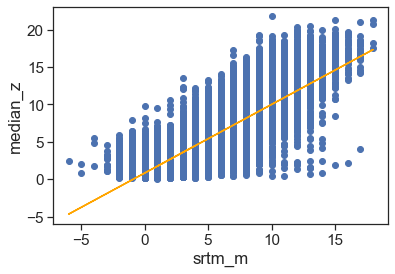

R squared: 0.665307961906048
intercept: [0.82126095]
slope: [[0.91714806]]
RMSE: 2.1290189282259044


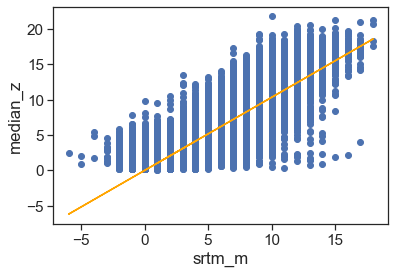

R squared: 0.6504320412313518
intercept: 0.0
slope: [[1.03199567]]
RMSE: 2.1758183809945666


In [70]:
linear_regress(groupedSRTM_gliht_gmf, 'srtm_m', 'median_z', True)
linear_regress(groupedSRTM_gliht_gmf, 'srtm_m', 'median_z', False) # define intercept as 0

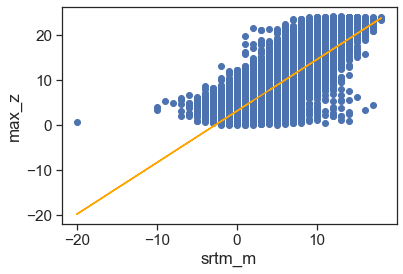

R squared: 0.6371422190224839
intercept: [3.16096535]
slope: [[1.14649585]]
RMSE: 2.6257397112950165


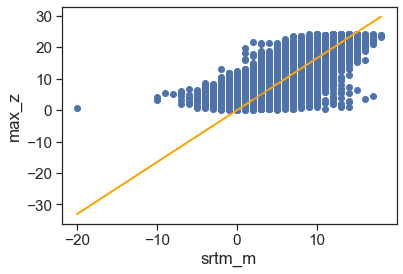

R squared: 0.4348946391151758
intercept: 0.0
slope: [[1.65322307]]
RMSE: 3.2767866520711992


In [71]:
linear_regress(groupedSRTM_gliht_gmw2016, 'srtm_m', 'max_z', True)
linear_regress(groupedSRTM_gliht_gmw2016, 'srtm_m', 'max_z', False) # define intercept as 0

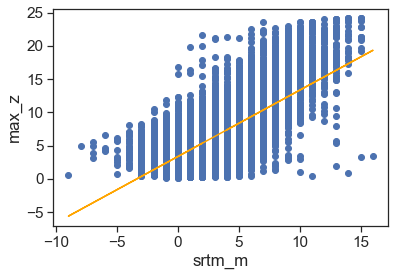

R squared: 0.5063479159056195
intercept: [3.37530189]
slope: [[0.99687234]]
RMSE: 2.5067224914177397


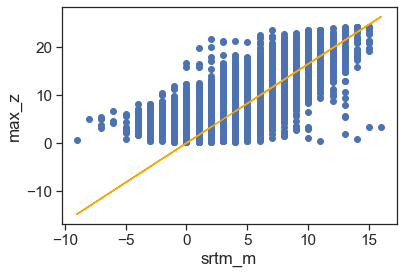

R squared: 0.13423129367593567
intercept: 0.0
slope: [[1.65007699]]
RMSE: 3.319683747759808


In [72]:
linear_regress(groupedSRTM_gliht_wam, 'srtm_m', 'max_z', True)
linear_regress(groupedSRTM_gliht_wam, 'srtm_m', 'max_z', False) # define intercept as 0

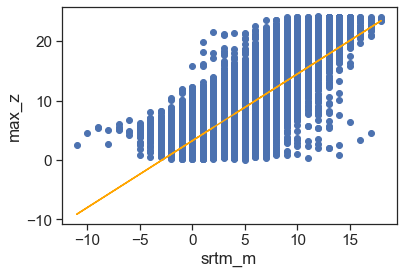

R squared: 0.615487712854719
intercept: [3.23824378]
slope: [[1.12210146]]
RMSE: 2.5950452537988546


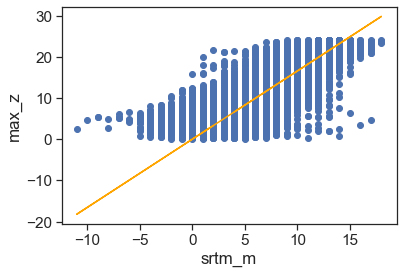

R squared: 0.3986410813026694
intercept: 0.0
slope: [[1.65402722]]
RMSE: 3.2453138463932283


In [73]:
linear_regress(groupedSRTM_gliht_ncMAR, 'srtm_m', 'max_z', True)
linear_regress(groupedSRTM_gliht_ncMAR, 'srtm_m', 'max_z', False) # define intercept as 0

# Group Points by SRTM cell ID to get max Canopy Height values per SRTM pixel

In [111]:
groupedHmax_gliht_gmf = grouped_glihtCHM(pts_gt0_gmf, ['hmax_idx','hmax95','hba95'])
groupedHmax_gliht_gmw2016 = grouped_glihtCHM(pts_gt0_gmw2016, ['hmax_idx','hmax95','hba95'])
groupedHmax_gliht_wam = grouped_glihtCHM(pts_gt0_wam, ['hmax_idx','hmax95','hba95'])
groupedHmax_gliht_ncMAR = grouped_glihtCHM(pts_gt0_ncMAR, ['hmax_idx','hmax95','hba95'])

In [112]:
groupedHmax_gliht_gmf

,hmax_idx,hmax95,hba95,max_z,min_z,mean_z,median_z,var_z,skew_z,count_z
0,1567446787,0.0000,0.0000,0.48,2.300000e-01,0.336667,0.300,0.016633,1.175955,3
1,1567446788,0.0000,0.0000,3.07,1.700000e-01,1.659231,1.730,0.714834,-0.228426,39
2,1567446789,0.0000,0.0000,3.05,3.050000e+00,3.050000,3.050,NaN,NaN,1
3,1567446792,0.0000,0.0000,3.33,3.330000e+00,3.330000,3.330,NaN,NaN,1
4,1567446793,0.0000,0.0000,4.40,8.100000e-01,3.189429,3.180,0.477047,-0.910840,35
...,...,...,...,...,...,...,...,...,...,...
25049,2152635345,0.0000,0.0000,3.20,2.842171e-14,1.018462,0.790,0.732914,1.395398,13
25050,2152798168,0.8485,0.5377,1.72,4.300000e-01,1.055556,1.050,0.142128,0.343952,9
25051,2152798169,0.0000,0.0000,1.61,3.900000e-01,0.936667,0.955,0.147459,0.313807,18
25052,2152960992,0.8485,0.5377,3.00,4.900000e-01,1.300556,1.035,0.483688,1.751279,18


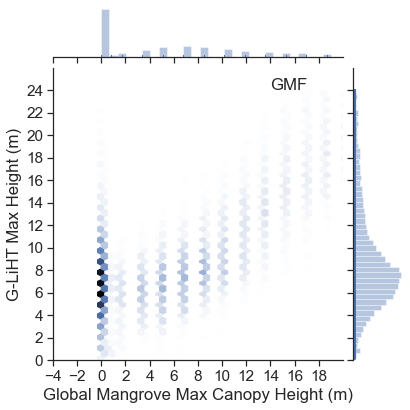

In [113]:
hexjointplot(groupedHmax_gliht_gmf, 'GMF', xatt='hmax95', yatt='max_z', xlabl="Global Mangrove Max Canopy Height (m)")

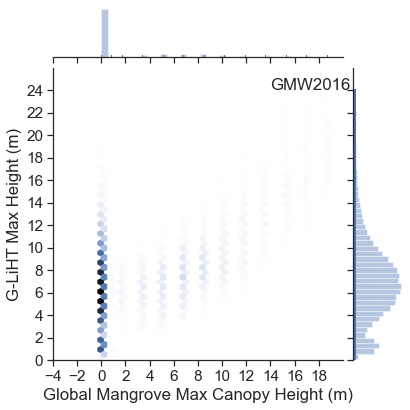

In [114]:
hexjointplot(groupedHmax_gliht_gmw2016, 'GMW2016', xatt='hmax95', yatt='max_z', xlabl="Global Mangrove Max Canopy Height (m)")

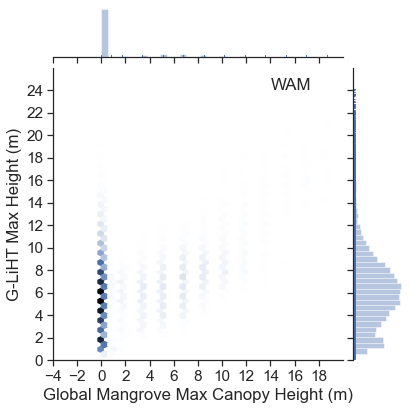

In [115]:
hexjointplot(groupedHmax_gliht_wam, 'WAM', xatt='hmax95', yatt='max_z', xlabl="Global Mangrove Max Canopy Height (m)")

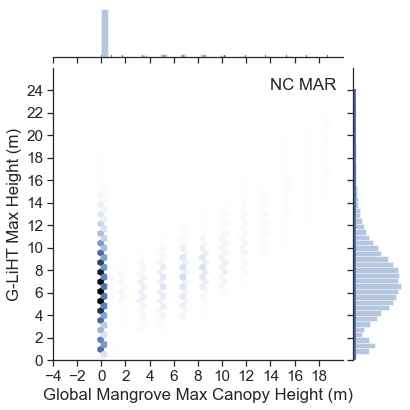

In [116]:
hexjointplot(groupedHmax_gliht_ncMAR, 'NC MAR', xatt='hmax95', yatt='max_z', xlabl="Global Mangrove Max Canopy Height (m)")

In [74]:
# %time pts_all.to_file(filename='andros_gliht_srtm_hmax95_tdx_mangroves3.shp', driver="ESRI Shapefile")